## A large portion of this code is taken from Aurélien Géron's: Hands-On machine learning with SciKit-Learn, Keras and Tensorflow (2nd edition). I have put comments based on information in the book as well as information I found elsewhere.

## Chapter 15¶

In [25]:
import numpy as np
import keras
from matplotlib import pyplot as plt

In [26]:
# Create a time series
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)  # The 1 at the end denotes univariate series.
                                                                         # i.e. predicting a single value.
                                                                         # If predicting 10 values in the future,
                                                                         # the last 1 would be 10.
    time = np.linspace(0, 1, n_steps)                             # time
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # noise centered around 0
    return series[..., np.newaxis].astype(np.float32)             # Returns a series:
                                                                  #    [ [[[0.1], [0.2]], [[0.3], [0.4]]], 
                                                                  #      [[[0.5], [0.6]], [[0.7], [0.8]]], 
                                                                  #      [[[0.9], [0.1]], [[0.1], [0.2]]] ]
                                                                  # The newaxis creates a [] around each value.

In [27]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)  # predict (n_steps + 1) value from n_steps values
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

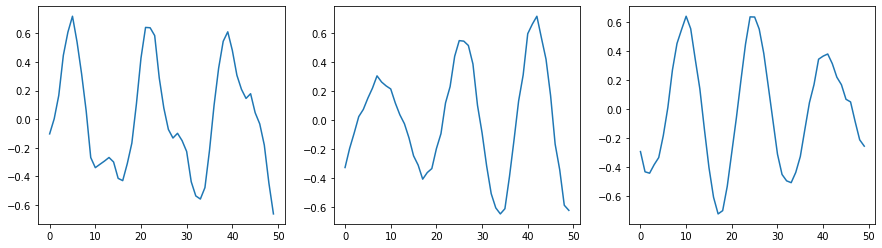

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(X_train[0])
axes[1].plot(X_valid[0])
axes[2].plot(X_test[0]);

#### Baseline performance

In [29]:
# Predict baseline performance as the same as
# the last value.
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020652978

#### Linear Regression using a single neuron neural network

In [41]:
# A linear regression model as a neural network
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),  # A fully-connected model needs input to be flattened
    keras.layers.Dense(1)                       # A single neuron. It has a weight and bias. 2 variable neural network
])

In [42]:
model.compile(optimizer='adam', loss='mse')

In [43]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 617us/step - loss: 0.0842
Epoch 2/20
219/219 [==============================] - 0s 607us/step - loss: 0.0219
Epoch 3/20
219/219 [==============================] - 0s 609us/step - loss: 0.0124
Epoch 4/20
219/219 [==============================] - 0s 620us/step - loss: 0.0094
Epoch 5/20
219/219 [==============================] - 0s 614us/step - loss: 0.0081
Epoch 6/20
219/219 [==============================] - 0s 619us/step - loss: 0.0072
Epoch 7/20
219/219 [==============================] - 0s 673us/step - loss: 0.0065
Epoch 8/20
219/219 [==============================] - 0s 844us/step - loss: 0.0059
Epoch 9/20
219/219 [==============================] - 0s 687us/step - loss: 0.0054
Epoch 10/20
219/219 [==============================] - 0s 685us/step - loss: 0.0050
Epoch 11/20
219/219 [==============================] - 0s 697us/step - loss: 0.0047
Epoch 12/20
219/219 [==============================] - 0s 733us/step - loss: 0.0045
E

In [44]:
np.mean(keras.losses.mean_squared_error(y_valid, 
                                        model.predict(X_valid)))

0.0037777682

#### RNN

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]) # Single neuron RNN. Can process any length input,
                                                     # so input_shape has first shape value as None.
                                                     # SimpleRNN uses tanh activation function by default,
                                                     # which returns values between -1 and 1. So our predicted
                                                     # values must lie in this range.
                                                     # For these reasons, we can use a Dense layer as an output layer.
                                                     # Then:
                                                     #   - we can specify any activation function
                                                     #   - dense layer is a little faster than a SimpleRNN layer
                                                     #   - our output values can match the range of our 
                                                     #     y data values
                                                     # Select the 'Different Activation function' below to see
                                                     # this code in this same notebook.
])

[Different Activation function](#diff_activation_func)

In [50]:
model.compile(optimizer='adam', loss='mse')

In [51]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0898
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0655
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0465
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0316
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0214
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0157
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0132
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0124
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0121
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0119
Epoch 11/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0117
Epoch 12/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0116
Epoch 13/20
219/219 [====

In [48]:
np.mean(keras.losses.mean_squared_error(y_valid,
                                        model.predict(X_valid)))

0.014131511

#### This RNN model did worse than the Linear Regression model because the Linear Regression model had 51 parameters (one weight for each input + bias term. For the RNN, we have one weight for the input and one weight for the hidden state + a bias term totaling 3 parameters.

#### Deep RNN

In [53]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),  # Must specify return_sequences=True
    keras.layers.SimpleRNN(20, return_sequences=True),                         # else next layer will get incorrect
                                                                               # shape of input.
    keras.layers.SimpleRNN(1)  # Since we need a single output per time value, use a single neuron at the end
])

In [55]:
model.compile(optimizer='adam', loss='mse')

In [57]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0038
Epoch 2/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0033
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0031
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0030
Epoch 5/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0029
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0029
Epoch 7/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0029
Epoch 8/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0029
Epoch 9/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0029
Epoch 10/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0029
Epoch 11/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0029
Epoch 13/20
2

In [58]:
np.mean(keras.losses.mean_squared_error(y_valid,
                                        model.predict(X_valid)))

0.0026821936

#### With the above RNN, we finally beat the Linear Regression model

<a id='diff_activation_func'></a>

In [59]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),  # Must remove return_sequences=True from this layer since the next one
                                 # is not a RNN layer, just a dense layer and will be fully-connected to this layer.
    keras.layers.Dense(1)  # Since we need a single output per time value, use a single neuron at the end.
])

In [60]:
model.compile(optimizer='adam', loss='mse')

In [61]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0168
Epoch 2/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0040
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0034
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0032
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0032
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0031
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030
Epoch 9/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0030
Epoch 10/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030
Epoch 11/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030
Epoch 12/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0029
Epoch 13/20
2

#### We can see that the above model converges faster than with the SimpleRNN layer at the end, and produces a similar fit